In [1]:
import import_ipynb
import tfm_generic_functions as traffic

# https://docs.python.org/3/library/os.html
import os

# http://scikit-image.org/docs/stable/api/api.html
import skimage
from skimage import data, io

# https://docs.scipy.org/doc/numpy/reference/
import numpy as np

import keras

from keras import models

# Core Layers: https://keras.io/layers/core/
# Convolution Layers: https://keras.io/layers/convolutional/
from keras import layers

# https://matplotlib.org/api/index.html
import matplotlib

# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot
import matplotlib.pyplot as plt

importing Jupyter notebook from tfm_generic_functions.ipynb


Using TensorFlow backend.


In [2]:
OFFSET = 1
IMG_SHAPE = (64, 64)
ROOT_PATH = os.getcwd()

In [3]:
def get_keras_model_detector(classes):
    # IMPLEMENTACIÓN RED NEURONAL
    # En Keras la envoltura para cualquier red neuronal se crea con la clase Sequential
    model = models.Sequential()

    model.add(layers.Conv2D(32, (5, 5),
                            activation='elu', input_shape=(IMG_SHAPE[0], IMG_SHAPE[1], 3)))
    model.add(layers.MaxPooling2D(2, 2))
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(64, (5, 5), activation='elu'))
    model.add(layers.MaxPooling2D(2, 2))
    model.add(layers.Dropout(0.2))
    
    model.add(layers.Conv2D(128, (5, 5), activation='elu'))
    model.add(layers.MaxPooling2D(2, 2))
    model.add(layers.Dropout(0.2))
    
    model.add(layers.MaxPooling2D(2, 2))
    model.add(layers.Dropout(0.2))

    model.add(layers.Flatten())
    model.add(layers.Dense(classes, activation='softmax'))
    return model

In [4]:
def load_trained_model_detector(weights_path):
    model = get_keras_model_detector(2)
    model.load_weights(weights_path)
    return model

In [5]:
model_detector = load_trained_model_detector(os.path.join(ROOT_PATH, "model_data_aug_64_64_gpu_detector.h5"))
model_detector.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [6]:
images_test_path = [os.path.join(ROOT_PATH, "images_test/Prohibido_001.jpg"),
                    os.path.join(ROOT_PATH, "images_test/Rotonda_001.jpg"),
                    os.path.join(ROOT_PATH, "images_test/Stop_001.jpg")]

In [7]:
def get_tiles(image, tile_shape, offset):
    tiles = []
    xx = tile_shape[0]
    yy = tile_shape[1]
    for x in range(0, image.shape[0]- xx, offset):
        for y in range(0, image.shape[1] - yy, offset):
            tile = image[x:x + xx, y:y + yy]
            tiles.append(tile)
    return tiles

In [8]:
def get_normalized_image(image_path):
    image_test = skimage.data.imread(image_path)
    height = image_test.shape[0]
    width = image_test.shape[1]
    return skimage.transform.resize(image_test, (height, width), mode='constant')

In [9]:
def getCenter(index, img_size, img_shape):
    img_width = img_size[1]
    img_heigth = img_size[0]
    sh_width = img_shape[1]
    sh_height = img_shape[0]
    max_row = img_width - sh_width
    
    row = int(index / max_row)
    col = index % max_row
        
    centerY = row + (sh_height / 2)
    centerX = col + (sh_width / 2)

    center = (centerX, centerY)
    return center

In [10]:
def paintPointOnImage(x, y, img):
    color = [255, 0, 0]
    point_size = 3
    offset = int(point_size / 2)
    for xx in range(x - offset, x + offset + 1):
        for yy in range(y - offset, y + offset + 1):
            img[xx, yy] = color

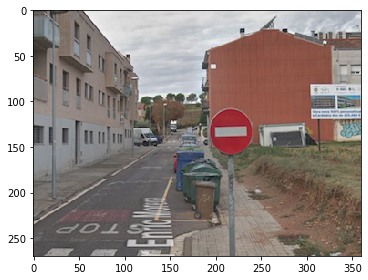

/Users/togohi/traffic/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:78: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/Users/togohi/Downloads/traffic/images_test/Prohibido_001.jpg - Detected traffic signs in 7588 tiles


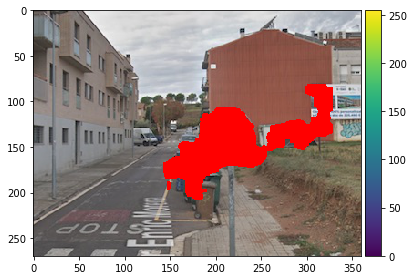

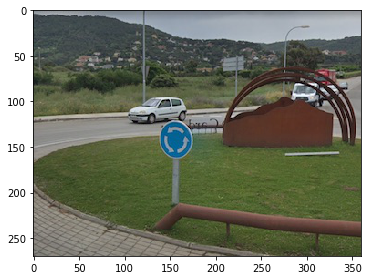

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/Users/togohi/Downloads/traffic/images_test/Rotonda_001.jpg - Detected traffic signs in 5750 tiles


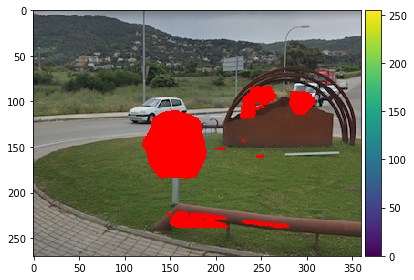

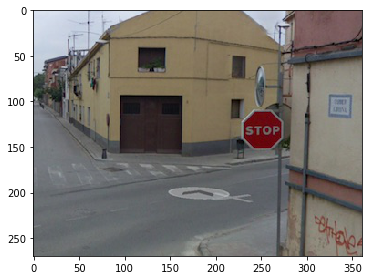

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/Users/togohi/Downloads/traffic/images_test/Stop_001.jpg - Detected traffic signs in 4048 tiles


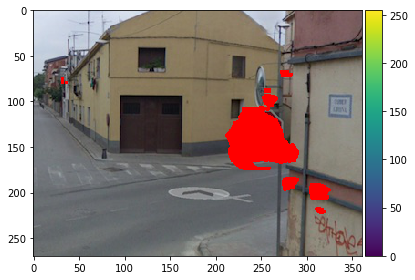

In [11]:
for image_path in images_test_path:
    image_test = get_normalized_image(image_path)
    image_edit = get_normalized_image(image_path)
    io.imshow(image_test) 
    plt.show()
    image_tiles = get_tiles(image_test, IMG_SHAPE, OFFSET)
    detected_tiles = []
    for index in range(0, len(image_tiles)):
        tile = image_tiles[index]        
        np_tile = np.expand_dims(tile, axis=0)
        result = model_detector.predict_classes(np_tile)
        if result == 1:
            center = getCenter(index, image_test.shape, IMG_SHAPE)
            paintPointOnImage(int(center[1]), int(center[0]), image_edit)
            detected_tiles.append(tile)
    print("{} - Detected traffic signs in {} tiles".format(image_path, len(detected_tiles)))
    io.imshow(image_edit) 
    plt.show()